# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy.visualization import simple_norm
from astropy.wcs import WCS
import numpy as np
from astropy.stats import sigma_clip
from astropy.io import fits

from scipy import signal
import pickle as pkl

# Single data

In [2]:
df = pd.read_csv('./data/604826.csv', comment='#')
df

ALPHA_J2000  DELTA_J2000    FLUX_AUTO  FLUX_RELERR_AUTO  CLASS_STAR  \
0        215.231831    52.898138  1490.617920          0.019974       0.743   
1        214.894545    53.097003    94.664742          0.248657       0.489   
2        215.091284    52.979154    61.705227          0.310547       0.379   
3        215.207562    52.909093   900.460815          0.034485       0.840   
4        215.490903    53.493301    42.644035          0.594238       0.470   
...             ...          ...          ...               ...         ...   
604565   214.515393    52.745339    79.415420          0.074951       0.521   
604566   214.812878    52.561756    52.774242          0.072021       0.269   
604567   214.689575    52.637103    14.581264          0.144287       0.509   
604568   214.757007    52.595075     9.663751          0.207642       0.525   
604569   214.250261    52.317629    19.758976          0.136597       0.564   

        TILE_ID  FILTER_ID  
0          2351          1  
1          2351          1  
2          2351          1  
3          2351          1  
4          2351          1  
...         ...        ...  
604565     2242         60  
604566     2242         60  
604567     2242         60  
604568     2242         60  
604569     2242         60  

[604570 rows x 7 columns]

In [3]:
df.value_counts('FILTER_ID')

FILTER_ID
59    24614
60    21503
30    20959
31    20626
35    16658
28    15455
36    15409
50    14996
32    14908
29    14224
38    13869
39    13710
34    11974
17    11943
10    11454
24    11060
43    10928
58    10830
51    10631
33    10590
46    10587
25    10530
56    10369
41    10003
47     9962
45     9681
22     9555
44     9283
19     9091
14     9063
27     9009
21     8990
42     8882
49     8872
40     8801
37     8734
15     8677
18     8596
48     8595
55     8555
26     8325
3      8267
11     8162
52     7975
54     7874
7      7429
8      7136
53     6934
12     6709
23     6606
20     6483
4      5860
13     5703
16     5512
1      5015
2      4507
9      4351
5      4135
6      3896
57     1515
Name: count, dtype: int64

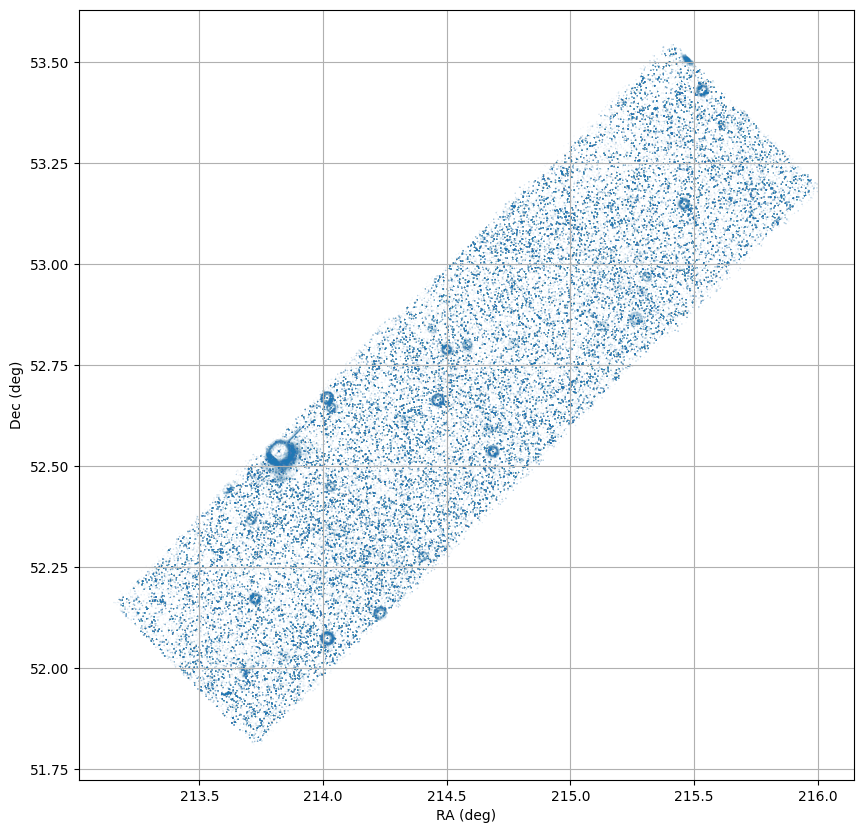

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df['ALPHA_J2000'], y=df['DELTA_J2000'], s=1, 
            alpha=0.05, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.grid()
plt.show()

# Dula data

In [4]:
df_dual = pd.read_csv('./data/702826.csv', comment='#')
df_dual

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                                                   FLAGS  \
0      17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 1...   
1      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
2      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
3      16 16 16 17 17 17 17 17 16 16 17 17 17 17 17 1...   
4      18 18 18 19 19 19 19 18 18 18 19 19 19 19 18 1...   
...                                                  ...   
64288  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.398938924 0.671059191 0.671870828 0.0 0.0 0....   
1      0.20837152 0.89839673 0.681177855 0.0 0.0 0.41...   
2      0.217361659 0.913546681 0.701026499 0.0 0.0 0....   
3      0.426156312 0.916839361 0.186319813 0.0 0.0 0....   
4      0.399055988 0.655363321 0.687582672 0.0 0.0 0....   
...                                                  ...   
64288  0.956941068 0.973625004 0.976183474 0.98467809...   
64289  0.947082579 0.965922475 0.944739759 0.96594297...   
64290  0.923828781 0.937540472 0.942529678 0.95318043...   
64291  0.967528522 0.97575736 0.973541498 0.978428304...   
64292  0.960996389 0.972236931 0.977609754 0.99181813...   

                                              MASK_FLAGS  \
0      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
3      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
...                                                  ...   
64288  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 11 0 0 0 0 8 8...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3     

In [5]:
df_dual.columns

Index(['TILE_ID', 'NUMBER', 'ALPHA_J2000', 'DELTA_J2000', 'hpix11', 'X_IMAGE',
       'Y_IMAGE', 'R_EFF', 'FWHM_WORLD', 'A_WORLD', 'B_WORLD', 'THETA_J2000',
       'ISOAREA_WORLD', 'RELERRA_WORLD', 'RELERRB_WORLD', 'ERRTHETA_J2000',
       'CLASS_STAR', 'FLUX_AUTO', 'FLUX_ISO', 'FLUX_PETRO', 'FLUX_MAX_ARCSEC2',
       'PETRO_RADIUS', 'KRON_RADIUS', 'FLUX_APER_0_8', 'FLUX_APER_1_0',
       'FLUX_APER_1_2', 'FLUX_APER_1_5', 'FLUX_APER_2_0', 'FLUX_APER_3_0',
       'FLUX_APER_4_0', 'FLUX_APER_6_0', 'FLUX_RELERR_AUTO', 'FLUX_RELERR_ISO',
       'FLUX_RELERR_PETRO', 'FLUX_RELERR_APER_0_8', 'FLUX_RELERR_APER_1_0',
       'FLUX_RELERR_APER_1_2', 'FLUX_RELERR_APER_1_5', 'FLUX_RELERR_APER_2_0',
       'FLUX_RELERR_APER_3_0', 'FLUX_RELERR_APER_4_0', 'FLUX_RELERR_APER_6_0',
       'FLAGS', 'NORM_WMAP_VAL', 'MASK_FLAGS', 'SINGLE_DETECT',
       'FLUX_ISO_WORSTPSF', 'FLUX_RELERR_ISO_WORSTPSF', 'FLUX_PSFCOR',
       'FLUX_RELERR_PSFCOR', 'FLUX_APER3_WORSTPSF',
       'FLUX_RELERR_APER3_WORSTPSF'],
 

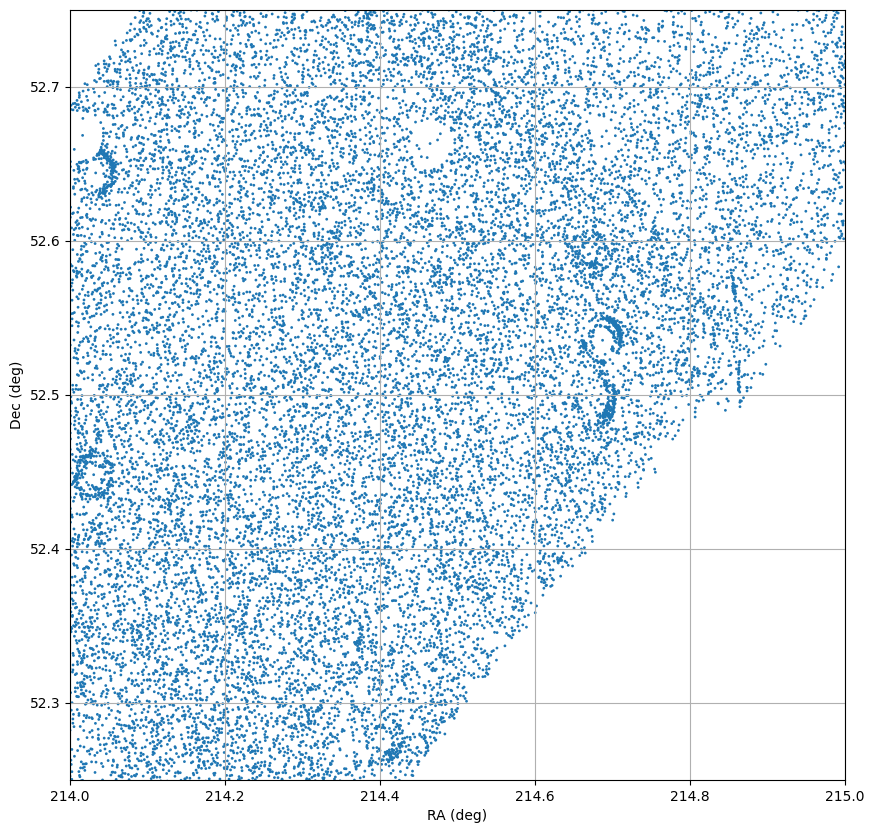

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            alpha=1, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214, 215)
plt.ylim(52.25, 52.75)
plt.grid()
plt.show()

# SDSS data

In [7]:
df_dual = pd.read_csv('./data/604827.csv', comment='#')
df_dual

ALPHA_J2000  DELTA_J2000  \
0       214.881557    53.103476   
1       214.861588    53.115839   
2       215.061658    52.998000   
3       215.180854    52.927186   
4       214.907509    53.089148   
...            ...          ...   
64288   215.064895    52.812546   
64289   214.688544    53.040802   
64290   215.186475    52.737363   
64291   215.084326    52.799349   
64292   215.068525    52.809148   

                                               FLUX_AUTO  \
0      182.865799 48.724514 88.6793365 0.0 0.0 -6.065...   
1      -1.43247414 -5.36248398 -13.7104988 -3.3015868...   
2      60.7909508 -10.184761 11.6957092 2.27859354 2....   
3      -2.15251517 0.169828132 -14.6118746 3.21706223...   
4      18.92099 4.24113035 16.713026 7.06329823 10.50...   
...                                                  ...   
64288  10.4889164 -10.5139389 22.524107 42.2049637 37...   
64289  -15.3364697 43.9341125 0.500564694 9.28878117 ...   
64290  32.1980095 23.9194908 24.1457367 75.9638672 73...   
64291  34.7161293 34.0826416 10.7551117 18.9449844 47...   
64292  13.473361 17.2105522 19.2490139 24.3374424 40....   

                                        FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  
0      0.358887 1.130859 0.291016 0.0 0.0 -3.511719 0...       0.676     2406  
1      -10.078125 -1.453125 -0.279297 -0.666504 0.0 1...       0.516     2406  
2      0.522461 -0.840332 0.762207 0.0 0.0 1.136719 0...       0.685     2406  
3      -5.394531 112.625 -0.611816 0.0 0.0 1.46582 0....       0.573     2406  
4      3.087891 10.367188 1.134766 3.466797 0.0 0.645...       0.750     2406  
...                                                  ...         ...      ...  
64288  3.138672 -1.167969 0.703125 0.546387 0.820312 ...       0.160     2243  
64289  -0.79248 0.48584 25.78125 1.992188 -1.319336 -...       0.358     2243  
64290  0.785645 0.862305 0.494141 0.230591 0.31665 0....       0.938     2243  
64291  0.599609 0.513184 0.945801 0.785645 0.413818 0...       0.441     2243  
64292  1.398438 0.911621 0.467041 0.545898 0.437744 0...       0.462     2243  

[64293 rows x 6 columns]

In [7]:
ra_c = (df_dual['ALPHA_J2000'].max() + df_dual['ALPHA_J2000'].min()) / 2
dec_c = (df_dual['DELTA_J2000'].max() + df_dual['DELTA_J2000'].min()) / 2
ra_c, dec_c

(214.575034115, 52.67628441135)

In [8]:
ra_delta = df_dual['ALPHA_J2000'].max() - df_dual['ALPHA_J2000'].min()
dec_delta = df_dual['DELTA_J2000'].max() - df_dual['DELTA_J2000'].min()
ra_delta, dec_delta

(2.827816296000009, 1.7266420528999973)

In [9]:
rad = 3 * u.arcmin
rad

<Quantity 3. arcmin>

In [10]:
coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
coords, len(coords)

(<SkyCoord (ICRS): (ra, dec) in deg
     [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
      (215.06165824, 52.99799953), ..., (215.18647509, 52.73736272),
      (215.08432624, 52.79934893), (215.06852464, 52.80914842)]>,
 64293)

In [11]:
center = SkyCoord(ra=ra_c, dec=dec_c, unit=(u.deg, u.deg), frame='icrs')
xid = SDSS.query_region(center, radius=rad)
xid

<Table length=266>
       ra              dec               objid         run  rerun camcol field
    float64          float64             uint64       int64 int64 int64  int64
---------------- ---------------- ------------------- ----- ----- ------ -----
214.502951831203 52.6686038247542 1237661385994732006  3705   301      1   111
214.493511183676 52.6724849284308 1237661385994731996  3705   301      1   111
214.527681669406 52.6442452757406 1237661385994731577  3705   301      1   111
214.525982484492 52.6445006066207 1237661416065663439  3712   301      1   205
214.525982484492 52.6445006066207 1237661416065663440  3712   301      1   205
214.526125208059 52.6444875657194 1237661385994731575  3705   301      1   111
 214.51531126067 52.6522476690934 1237661385994732253  3705   301      1   111
214.519435957081 52.6509344845996 1237661385994732256  3705   301      1   111
214.518112483302 52.6416751488623 1237661385994731574  3705   301      1   111
             ...              ...                 ...   ...   ...    ...   ...
214.620316892585 52.7180026470424 1237661385994732290  3705   301      1   111
214.622730945188 52.7150681205848 1237661385994732475  3705   301      1   111
214.577233566093 52.7160248899293 1237661385994732031  3705   301      1   111
214.564289595996 52.7137220127019 1237661385994732027  3705   301      1   111
214.572511689239  52.715200768955 1237661385994732458  3705   301      1   111
 214.55985916205 52.7225698586912 1237661385994731829  3705   301      1   111
 214.57605926435 52.7252703851718 1237661385994731685  3705   301      1   111
214.576052797583 52.7252723779189 1237661385994731684  3705   301      1   111
214.578160263384 52.7227990852712 1237661385994732459  3705   301      1   111
 214.56614901299 52.7225293148845 1237661385994731831  3705   301      1   111

In [12]:
df_sdss = xid.to_pandas()
df_sdss

ra        dec                objid   run  rerun  camcol  field
0    214.502952  52.668604  1237661385994732006  3705    301       1    111
1    214.493511  52.672485  1237661385994731996  3705    301       1    111
2    214.527682  52.644245  1237661385994731577  3705    301       1    111
3    214.525982  52.644501  1237661416065663439  3712    301       1    205
4    214.525982  52.644501  1237661416065663440  3712    301       1    205
..          ...        ...                  ...   ...    ...     ...    ...
261  214.559859  52.722570  1237661385994731829  3705    301       1    111
262  214.576059  52.725270  1237661385994731685  3705    301       1    111
263  214.576053  52.725272  1237661385994731684  3705    301       1    111
264  214.578160  52.722799  1237661385994732459  3705    301       1    111
265  214.566149  52.722529  1237661385994731831  3705    301       1    111

[266 rows x 7 columns]

In [14]:
df_runs = df_sdss.value_counts(['run', 'camcol', 'field'])
df_runs

run   camcol  field
3705  1       111      251
3712  1       205       15
Name: count, dtype: int64

In [15]:
run, camcol, field = df_runs.index[0]
imgs = SDSS.get_images(run=run, camcol=camcol, field=field)

In [16]:
w = WCS(imgs[0][0].header)
w

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : np.float64(214.61319279) np.float64(52.7280517703) 
CRPIX : np.float64(1025.0) np.float64(745.0) 
CD1_1 CD1_2  : np.float64(4.58331020418e-05) np.float64(9.998384818e-05) 
CD2_1 CD2_2  : np.float64(9.99538649688e-05) np.float64(-4.58470133214e-05) 
NAXIS : 2048  1489

In [17]:
data = imgs[0][0].data

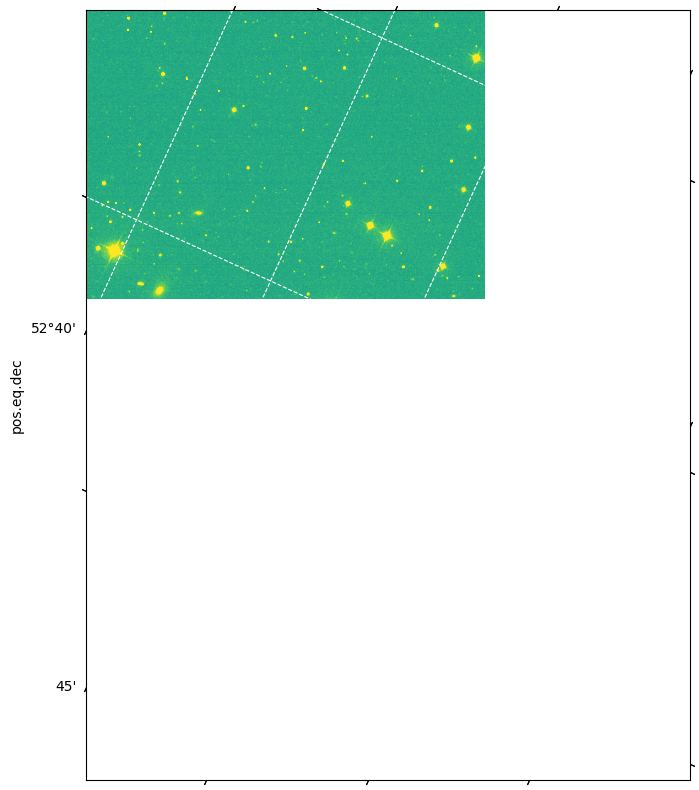

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=w) 
norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(imgs[0][0].data, norm=norm, origin='lower')
plt.grid(color='white', ls='dashed')
plt.scatter(214.256748507,  53.0595079902, transform=ax.get_transform('icrs'), s=100, edgecolor='white', facecolor='none')
plt.show()

# SDSS SQL query

In [19]:
df_dual = pd.read_csv('./data/604827.csv', comment='#')
df_dual

ALPHA_J2000  DELTA_J2000  \
0       214.881557    53.103476   
1       214.861588    53.115839   
2       215.061658    52.998000   
3       215.180854    52.927186   
4       214.907509    53.089148   
...            ...          ...   
64288   215.064895    52.812546   
64289   214.688544    53.040802   
64290   215.186475    52.737363   
64291   215.084326    52.799349   
64292   215.068525    52.809148   

                                               FLUX_AUTO  \
0      182.865799 48.724514 88.6793365 0.0 0.0 -6.065...   
1      -1.43247414 -5.36248398 -13.7104988 -3.3015868...   
2      60.7909508 -10.184761 11.6957092 2.27859354 2....   
3      -2.15251517 0.169828132 -14.6118746 3.21706223...   
4      18.92099 4.24113035 16.713026 7.06329823 10.50...   
...                                                  ...   
64288  10.4889164 -10.5139389 22.524107 42.2049637 37...   
64289  -15.3364697 43.9341125 0.500564694 9.28878117 ...   
64290  32.1980095 23.9194908 24.1457367 75.9638672 73...   
64291  34.7161293 34.0826416 10.7551117 18.9449844 47...   
64292  13.473361 17.2105522 19.2490139 24.3374424 40....   

                                        FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  
0      0.358887 1.130859 0.291016 0.0 0.0 -3.511719 0...       0.676     2406  
1      -10.078125 -1.453125 -0.279297 -0.666504 0.0 1...       0.516     2406  
2      0.522461 -0.840332 0.762207 0.0 0.0 1.136719 0...       0.685     2406  
3      -5.394531 112.625 -0.611816 0.0 0.0 1.46582 0....       0.573     2406  
4      3.087891 10.367188 1.134766 3.466797 0.0 0.645...       0.750     2406  
...                                                  ...         ...      ...  
64288  3.138672 -1.167969 0.703125 0.546387 0.820312 ...       0.160     2243  
64289  -0.79248 0.48584 25.78125 1.992188 -1.319336 -...       0.358     2243  
64290  0.785645 0.862305 0.494141 0.230591 0.31665 0....       0.938     2243  
64291  0.599609 0.513184 0.945801 0.785645 0.413818 0...       0.441     2243  
64292  1.398438 0.911621 0.467041 0.545898 0.437744 0...       0.462     2243  

[64293 rows x 6 columns]

In [13]:
query = f"""
SELECT 
   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, p.run, p.camcol, p.field, p.specObjID 
FROM PhotoPrimary AS p 
WHERE p.ra BETWEEN {df_dual['ALPHA_J2000'].min()} AND {df_dual['ALPHA_J2000'].max()} 
    AND p.dec BETWEEN {df_dual['DELTA_J2000'].min()} AND {df_dual['DELTA_J2000'].max()} 
    AND p.r BETWEEN 14 AND 22.0
"""
query

'\nSELECT \n   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, p.run, p.camcol, p.field, p.specObjID \nFROM PhotoPrimary AS p \nWHERE p.ra BETWEEN 213.161125967 AND 215.988942263 \n    AND p.dec BETWEEN 51.8129633849 AND 53.5396054378 \n    AND p.r BETWEEN 14 AND 22.0\n'

In [14]:
res = SDSS.query_sql(query)
df_sdss = res.to_pandas()
df_sdss

objid          ra        dec         u         g  \
0      1237659120933535961  215.686471  51.888975  21.60048  20.79800   
1      1237659120933535962  215.691696  51.873432  21.83422  21.10447   
2      1237659120933535974  215.779856  51.885560  21.29220  20.59911   
3      1237659120933535981  215.752146  51.819257  21.49586  21.56241   
4      1237659120933536065  215.732136  51.975318  22.92672  21.19168   
...                    ...         ...        ...       ...       ...   
35025  1237661417139601429  215.592339  53.109938  19.10984  18.19284   
35026  1237661417139601443  215.633796  53.083469  18.27794  15.99119   
35027  1237661417139601483  215.623497  53.210192  24.90825  21.89918   
35028  1237661417676341293  215.543180  53.517586  23.63537  20.42080   
35029  1237661417676341465  215.589489  53.530686  24.61092  21.37766   

              r         i         z   run  camcol  field            specObjID  
0      20.56732  20.50382  20.29586  3177       6     68  7913973368361342976  
1      20.72121  20.57257  20.24621  3177       6     68  7916303233399937024  
2      20.33166  20.23346  20.35112  3177       6     68  7913972818605529088  
3      21.33828  21.21995  21.13067  3177       6     68   240085642201290752  
4      20.83663  20.67382  20.64822  3177       6     68                    0  
...         ...       ...       ...   ...     ...    ...                  ...  
35025  17.91458  17.80065  17.80599  3712       3    208                    0  
35026  15.16507  14.92821  14.82867  3712       3    208                    0  
35027  20.46049  19.66483  19.21658  3712       3    208                    0  
35028  19.12765  18.54677  18.16476  3712       4    206                    0  
35029  20.31557  19.97529  19.64590  3712       4    206                    0  

[35030 rows x 12 columns]

In [17]:
# df_sdss.to_csv("./data/sdss_22_init.csv", index=False)
df_sdss_init = pd.read_csv("./data/sdss_22_init.csv")
df_sdss_init

objid          ra        dec         u         g  \
0      1237659120933535961  215.686471  51.888975  21.60048  20.79800   
1      1237659120933535962  215.691696  51.873432  21.83422  21.10447   
2      1237659120933535974  215.779856  51.885560  21.29220  20.59911   
3      1237659120933535981  215.752146  51.819257  21.49586  21.56241   
4      1237659120933536065  215.732136  51.975318  22.92672  21.19168   
...                    ...         ...        ...       ...       ...   
35025  1237661417139601429  215.592339  53.109938  19.10984  18.19284   
35026  1237661417139601443  215.633796  53.083469  18.27794  15.99119   
35027  1237661417139601483  215.623497  53.210192  24.90825  21.89918   
35028  1237661417676341293  215.543180  53.517586  23.63537  20.42080   
35029  1237661417676341465  215.589489  53.530686  24.61092  21.37766   

              r         i         z   run  camcol  field            specObjID  
0      20.56732  20.50382  20.29586  3177       6     68  7913973368361342976  
1      20.72121  20.57257  20.24621  3177       6     68  7916303233399937024  
2      20.33166  20.23346  20.35112  3177       6     68  7913972818605529088  
3      21.33828  21.21995  21.13067  3177       6     68   240085642201290752  
4      20.83663  20.67382  20.64822  3177       6     68                    0  
...         ...       ...       ...   ...     ...    ...                  ...  
35025  17.91458  17.80065  17.80599  3712       3    208                    0  
35026  15.16507  14.92821  14.82867  3712       3    208                    0  
35027  20.46049  19.66483  19.21658  3712       3    208                    0  
35028  19.12765  18.54677  18.16476  3712       4    206                    0  
35029  20.31557  19.97529  19.64590  3712       4    206                    0  

[35030 rows x 12 columns]

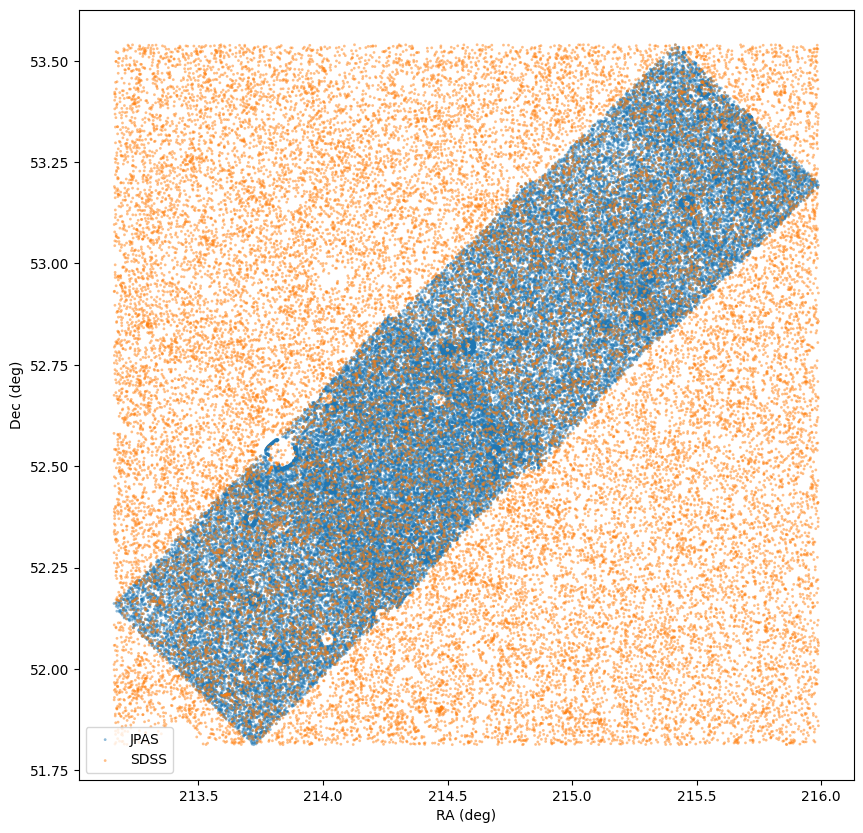

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss_init['ra'], y=df_sdss_init['dec'], s=4,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

In [19]:
jpcas_coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
sdss_coords = SkyCoord(ra=df_sdss_init['ra'], dec=df_sdss_init['dec'], unit=(u.deg, u.deg), frame='icrs')
jpcas_coords[:10]

<SkyCoord (ICRS): (ra, dec) in deg
    [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
     (215.06165824, 52.99799953), (215.18085383, 52.92718615),
     (214.90750932, 53.08914797), (215.02297422, 53.02092993),
     (214.95391176, 53.06188013), (214.87433046, 53.10899829),
     (215.12066902, 52.96337478), (215.30519592, 52.85336498)]>

In [20]:
# remove sdss objects that close 1 arcsec each other
# idx, sep2d, _ = sdss_coords.match_to_catalog_sky(sdss_coords, nthneighbor=2)
# cond = sep2d.arcsec < 1
# sdss_coords = sdss_coords[~cond]
# df_sdss = df_sdss_init[~cond].reset_index()
# df_sdss


In [21]:
idx, sep2d, _ =  sdss_coords.match_to_catalog_sky(jpcas_coords)
idx.shape

(35030,)

In [22]:
df_sdss_init['jpas_idx'] = idx
df_sdss_init['sep2d'] = sep2d.arcsec
df_sdss_init

objid          ra        dec         u         g  \
0      1237659120933535961  215.686471  51.888975  21.60048  20.79800   
1      1237659120933535962  215.691696  51.873432  21.83422  21.10447   
2      1237659120933535974  215.779856  51.885560  21.29220  20.59911   
3      1237659120933535981  215.752146  51.819257  21.49586  21.56241   
4      1237659120933536065  215.732136  51.975318  22.92672  21.19168   
...                    ...         ...        ...       ...       ...   
35025  1237661417139601429  215.592339  53.109938  19.10984  18.19284   
35026  1237661417139601443  215.633796  53.083469  18.27794  15.99119   
35027  1237661417139601483  215.623497  53.210192  24.90825  21.89918   
35028  1237661417676341293  215.543180  53.517586  23.63537  20.42080   
35029  1237661417676341465  215.589489  53.530686  24.61092  21.37766   

              r         i         z   run  camcol  field            specObjID  \
0      20.56732  20.50382  20.29586  3177       6     68  7913973368361342976   
1      20.72121  20.57257  20.24621  3177       6     68  7916303233399937024   
2      20.33166  20.23346  20.35112  3177       6     68  7913972818605529088   
3      21.33828  21.21995  21.13067  3177       6     68   240085642201290752   
4      20.83663  20.67382  20.64822  3177       6     68                    0   
...         ...       ...       ...   ...     ...    ...                  ...   
35025  17.91458  17.80065  17.80599  3712       3    208                    0   
35026  15.16507  14.92821  14.82867  3712       3    208                    0   
35027  20.46049  19.66483  19.21658  3712       3    208                    0   
35028  19.12765  18.54677  18.16476  3712       4    206                    0   
35029  20.31557  19.97529  19.64590  3712       4    206                    0   

       jpas_idx        sep2d  
0         50739  2829.658944  
1         50739  2880.322314  
2         50739  2975.065286  
3         50739  3116.549729  
4         50739  2668.755111  
...         ...          ...  
35025     11435     0.172537  
35026     11426     0.290046  
35027     29077     0.227675  
35028     10158   130.844145  
35029     10158   238.435653  

[35030 rows x 14 columns]

In [23]:
cond = df_sdss_init["sep2d"] < 1
df_sdss = df_sdss_init[cond]
sdss_idx = np.array(df_sdss.index)
df_sdss['sdss_idx'] = df_sdss.index
df_sdss.reset_index(inplace=True, drop=True)
df_sdss

/tmp/ipykernel_37601/3981891386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sdss['sdss_idx'] = df_sdss.index


objid          ra        dec         u         g  \
0      1237659120396075049  213.530172  52.039007  17.66726  16.27916   
1      1237659120396075265  213.349805  52.063320  22.39950  21.84116   
2      1237659120396075370  213.446918  52.082947  23.89956  22.44201   
3      1237659120396075489  213.513798  52.054400  23.52240  21.90862   
4      1237659120396075515  213.547831  52.068605  22.88224  22.86114   
...                    ...         ...        ...       ...       ...   
11224  1237661417139536032  215.559482  53.256418  20.48649  19.52012   
11225  1237661417139536037  215.576365  53.256054  20.00926  18.66720   
11226  1237661417139601429  215.592339  53.109938  19.10984  18.19284   
11227  1237661417139601443  215.633796  53.083469  18.27794  15.99119   
11228  1237661417139601483  215.623497  53.210192  24.90825  21.89918   

              r         i         z   run  camcol  field            specObjID  \
0      15.66404  15.38972  15.23753  3177       5     59                    0   
1      21.48263  21.25299  20.81412  3177       5     59  7912903818324760576   
2      21.95803  21.86967  22.40905  3177       5     59                    0   
3      20.79962  20.22176  19.83613  3177       5     59                    0   
4      21.72178  21.13414  20.78275  3177       5     59                    0   
...         ...       ...       ...   ...     ...    ...                  ...   
11224  19.06617  18.87737  18.88455  3712       3    207                    0   
11225  18.21419  18.06924  18.07462  3712       3    207                    0   
11226  17.91458  17.80065  17.80599  3712       3    208                    0   
11227  15.16507  14.92821  14.82867  3712       3    208                    0   
11228  20.46049  19.66483  19.21658  3712       3    208                    0   

       jpas_idx     sep2d  sdss_idx  
0         27154  0.108406        68  
1         21457  0.051055        71  
2         25849  0.171437        72  
3         26683  0.078713        73  
4         28845  0.094112        75  
...         ...       ...       ...  
11224     28435  0.109441     35023  
11225     28269  0.158993     35024  
11226     11435  0.172537     35025  
11227     11426  0.290046     35026  
11228     29077  0.227675     35027  

[11229 rows x 15 columns]

In [24]:
df_sdss['jpas_idx'].max(), df_sdss['sdss_idx'].max()

(64290, 35027)

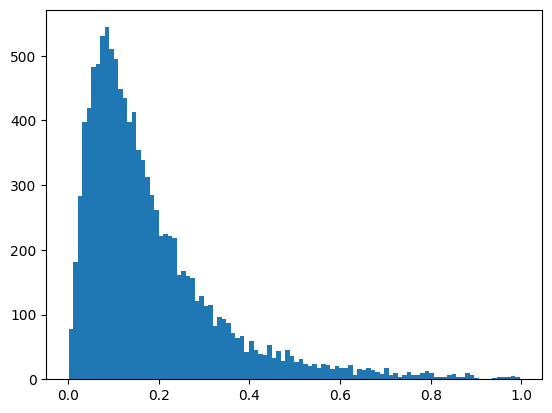

In [25]:
plt.hist(df_sdss['sep2d'], 
         bins=100, 
        #  range=(0, 2)
         )
plt.show()

In [26]:
# df_sdss_init = df_sdss.copy()
# df_sdss = df_sdss.iloc[idx]
# df_sdss

In [29]:
max_sep = 1 * u.arcsec
cond = sep2d < max_sep
# jpcas_matched = jpcas_coords[cond]
# sdss_coords_matched = sdss_coords[idx[cond]]

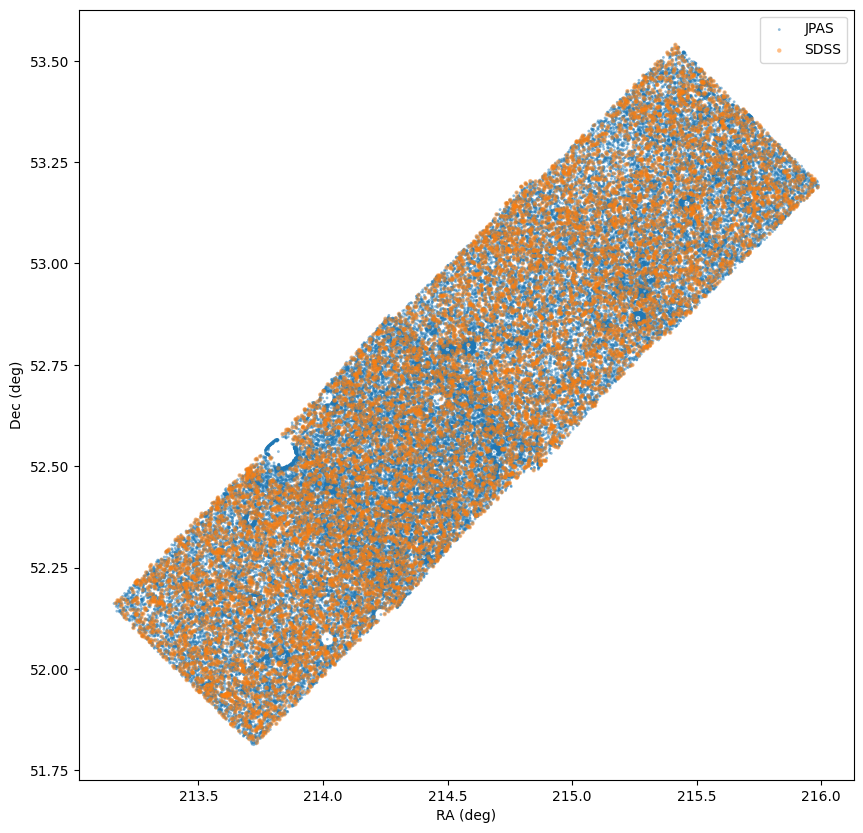

In [30]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss['ra'], y=df_sdss['dec'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

# SDSS images

In [43]:
df_runs = df_sdss.value_counts(['run', 'camcol', 'field'])
df_runs

run   camcol  field
3177  6       61       443
              60       409
3180  5       66       398
3705  2       111      397
              113      384
      1       112      382
      2       112      373
3180  5       64       368
              65       360
3712  1       205      356
      2       205      352
3177  5       60       351
3712  3       207      343
3177  6       59       343
3712  1       204      342
3705  1       111      338
              110      332
3712  2       207      324
              206      322
3705  3       112      321
3712  1       206      318
      3       208      317
              206      273
3177  5       59       270
      6       62       253
3705  3       113      238
3177  5       61       200
3180  5       67       163
3712  1       203      160
      2       204      156
3180  6       67       150
3712  3       205      144
3180  6       66       142
3705  1       113      140
3180  6       65       139
3705  2       114      131
3177  5 

In [44]:
run, camcol, field = df_runs.index[0]
imgs = SDSS.get_images(run=run, camcol=camcol, field=field)
w = WCS(imgs[0][0].header)
data = imgs[0][0].data

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [45]:
cat_pixels = w.all_world2pix(df_sdss['ra'], df_sdss['dec'], 0)
cond_phot = ((cat_pixels[0] > 0) & (cat_pixels[0] < data.shape[1]) 
             & (cat_pixels[1] > 0) & (cat_pixels[1] < data.shape[0])
             & (df_sdss['r'] < 22)
)
cond_spec = cond_phot & (df_sdss['specObjID'] != 0)

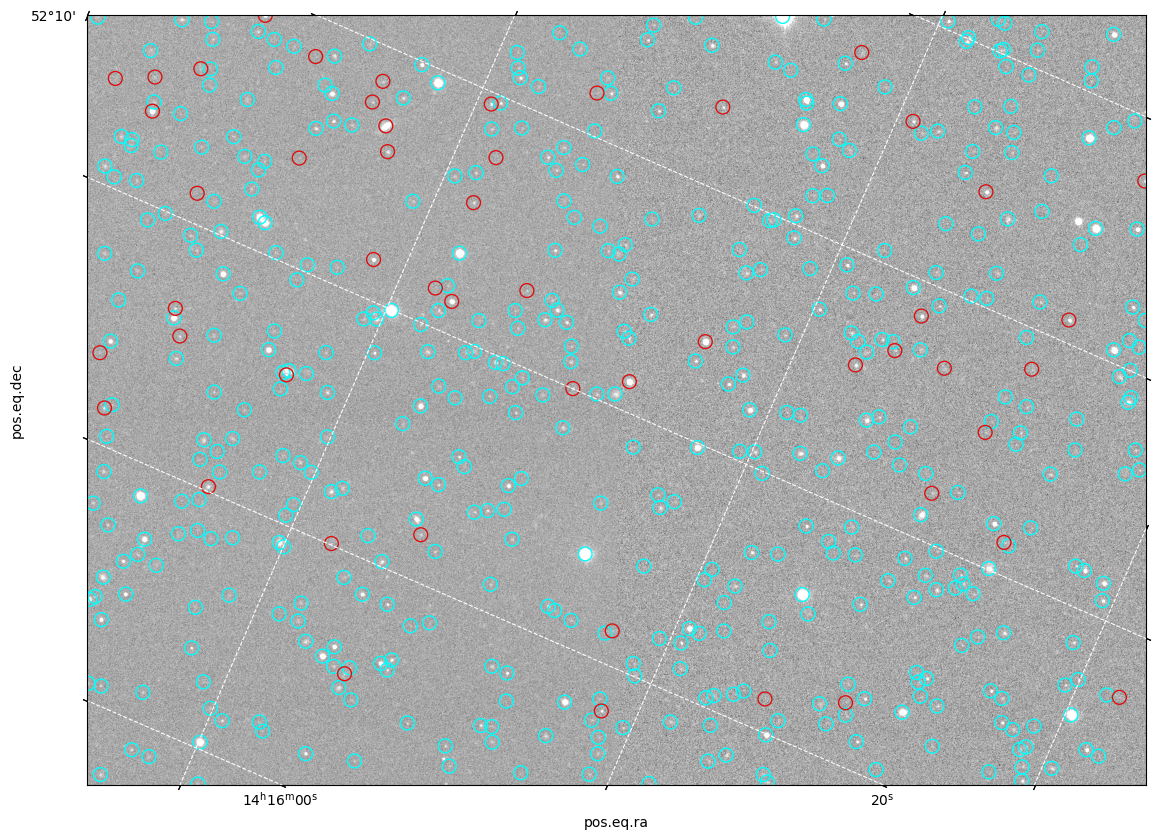

In [46]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection=w) 
norm = simple_norm(data, 'sqrt', percent=99.5)
plt.imshow(imgs[0][0].data, norm=norm, origin='lower', cmap='gray')
plt.grid(color='white', ls='dashed')
plt.scatter(df_sdss.loc[cond_phot, 'ra'],  df_sdss.loc[cond_phot, 'dec'], 
            transform=ax.get_transform('icrs'), s=100, 
            alpha = 1.0,
            edgecolor='cyan', facecolor='none')
plt.scatter(df_sdss.loc[cond_spec, 'ra'],  df_sdss.loc[cond_spec, 'dec'], 
            transform=ax.get_transform('icrs'), s=100, 
            alpha = 1.0,
            edgecolor='red', facecolor='none')
plt.show()

# Merge SDSS and JPAS data

In [31]:
df_merged = pd.merge(df_sdss, df_dual, left_on="jpas_idx", right_index=True, how="left")
df_merged

objid          ra        dec         u         g  \
0      1237659120396075049  213.530172  52.039007  17.66726  16.27916   
1      1237659120396075265  213.349805  52.063320  22.39950  21.84116   
2      1237659120396075370  213.446918  52.082947  23.89956  22.44201   
3      1237659120396075489  213.513798  52.054400  23.52240  21.90862   
4      1237659120396075515  213.547831  52.068605  22.88224  22.86114   
...                    ...         ...        ...       ...       ...   
11224  1237661417139536032  215.559482  53.256418  20.48649  19.52012   
11225  1237661417139536037  215.576365  53.256054  20.00926  18.66720   
11226  1237661417139601429  215.592339  53.109938  19.10984  18.19284   
11227  1237661417139601443  215.633796  53.083469  18.27794  15.99119   
11228  1237661417139601483  215.623497  53.210192  24.90825  21.89918   

              r         i         z   run  camcol  ...  \
0      15.66404  15.38972  15.23753  3177       5  ...   
1      21.48263  21.25299  20.81412  3177       5  ...   
2      21.95803  21.86967  22.40905  3177       5  ...   
3      20.79962  20.22176  19.83613  3177       5  ...   
4      21.72178  21.13414  20.78275  3177       5  ...   
...         ...       ...       ...   ...     ...  ...   
11224  19.06617  18.87737  18.88455  3712       3  ...   
11225  18.21419  18.06924  18.07462  3712       3  ...   
11226  17.91458  17.80065  17.80599  3712       3  ...   
11227  15.16507  14.92821  14.82867  3712       3  ...   
11228  20.46049  19.66483  19.21658  3712       3  ...   

                                                   FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.907054305 0.937141538 0.922013879 0.85035407...   
1      0.835532188 0.90825063 0.883063436 0.925633252...   
2      0.85641408 0.913120747 0.912831187 0.635815024...   
3      0.808303773 0.931182027 0.92353034 0.954758823...   
4      0.897583544 0.946072161 0.916385293 0.96038430...   
...                                                  ...   
11224  0.942010164 0.960936129 0.967858672 0.96571743...   
11225  0.957939267 0.969568551 0.967981577 0.97255265...   
11226  0.960779965 0.722407997 0.96877712 0.982665539...   
11227  0.737929821 0.949847698 0.950879633 0.96342504...   
11228  0.978038192 0.980446696 0.987521946 0.99689716...   

                                              MASK_FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      960 612 1584 1398 755 731 1865 1919 911 2751 1...   
1      0 0 1734 0 0 0 2059 2087 0 3050 0 1901 0 2341 ...   
2      0 0 0 0 0 0 0 0 0 2768 0 0 0 0 0 0 2823 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 2731 0 0 0 0 2242 0

<Axes: >

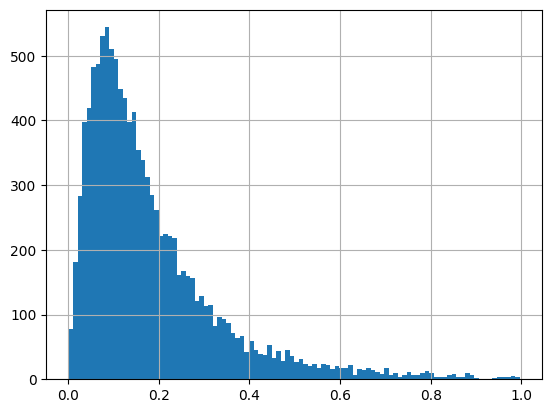

In [32]:
df_merged['sep2d'].hist(bins=100)

In [34]:
df_merged.to_csv('./data/merged3.csv', index=False)
# df_merged = pd.read_csv('./data/merged3.csv')
# df_merged

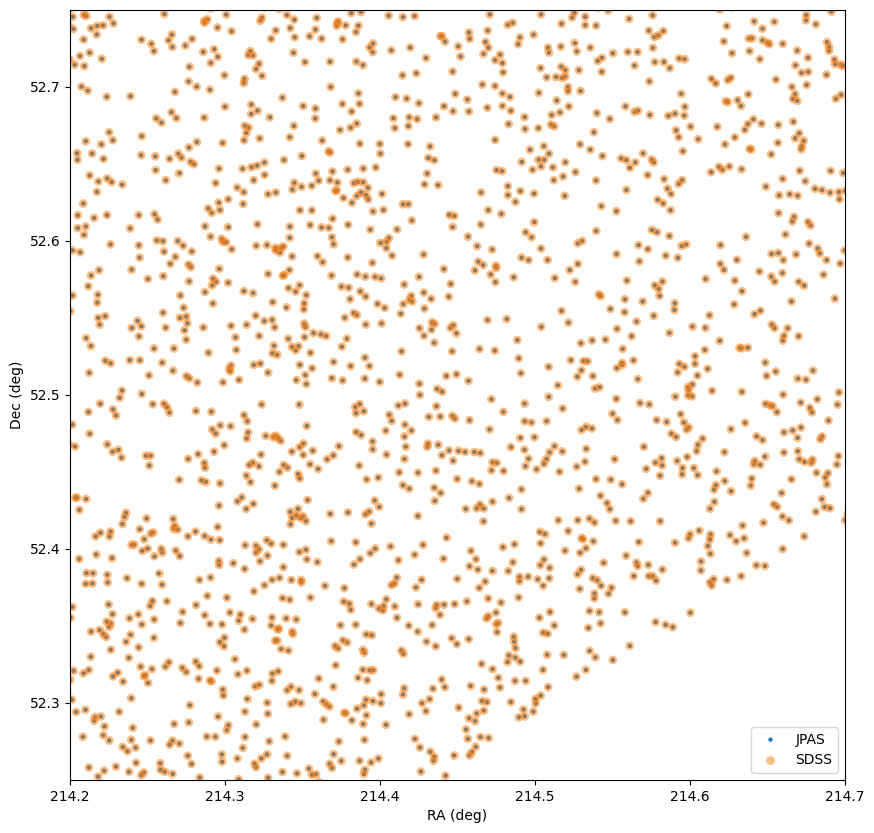

In [35]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_merged['ALPHA_J2000'], y=df_merged['DELTA_J2000'], s=10, 
            edgecolors='none', alpha=1.0, label='JPAS')
plt.scatter(x=df_merged['ra'], y=df_merged['dec'], s=40,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214.2, 214.7)
plt.ylim(52.25, 52.75)
plt.legend()
plt.show()

# Flux analysis

In [36]:
df_merged = pd.read_csv('./data/merged3.csv')
df_merged

objid          ra        dec         u         g  \
0      1237659120396075049  213.530172  52.039007  17.66726  16.27916   
1      1237659120396075265  213.349805  52.063320  22.39950  21.84116   
2      1237659120396075370  213.446918  52.082947  23.89956  22.44201   
3      1237659120396075489  213.513798  52.054400  23.52240  21.90862   
4      1237659120396075515  213.547831  52.068605  22.88224  22.86114   
...                    ...         ...        ...       ...       ...   
11224  1237661417139536032  215.559482  53.256418  20.48649  19.52012   
11225  1237661417139536037  215.576365  53.256054  20.00926  18.66720   
11226  1237661417139601429  215.592339  53.109938  19.10984  18.19284   
11227  1237661417139601443  215.633796  53.083469  18.27794  15.99119   
11228  1237661417139601483  215.623497  53.210192  24.90825  21.89918   

              r         i         z   run  camcol  ...  \
0      15.66404  15.38972  15.23753  3177       5  ...   
1      21.48263  21.25299  20.81412  3177       5  ...   
2      21.95803  21.86967  22.40905  3177       5  ...   
3      20.79962  20.22176  19.83613  3177       5  ...   
4      21.72178  21.13414  20.78275  3177       5  ...   
...         ...       ...       ...   ...     ...  ...   
11224  19.06617  18.87737  18.88455  3712       3  ...   
11225  18.21419  18.06924  18.07462  3712       3  ...   
11226  17.91458  17.80065  17.80599  3712       3  ...   
11227  15.16507  14.92821  14.82867  3712       3  ...   
11228  20.46049  19.66483  19.21658  3712       3  ...   

                                                   FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.907054305 0.937141538 0.922013879 0.85035407...   
1      0.835532188 0.90825063 0.883063436 0.925633252...   
2      0.85641408 0.913120747 0.912831187 0.635815024...   
3      0.808303773 0.931182027 0.92353034 0.954758823...   
4      0.897583544 0.946072161 0.916385293 0.96038430...   
...                                                  ...   
11224  0.942010164 0.960936129 0.967858672 0.96571743...   
11225  0.957939267 0.969568551 0.967981577 0.97255265...   
11226  0.960779965 0.722407997 0.96877712 0.982665539...   
11227  0.737929821 0.949847698 0.950879633 0.96342504...   
11228  0.978038192 0.980446696 0.987521946 0.99689716...   

                                              MASK_FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      960 612 1584 1398 755 731 1865 1919 911 2751 1...   
1      0 0 1734 0 0 0 2059 2087 0 3050 0 1901 0 2341 ...   
2      0 0 0 0 0 0 0 0 0 2768 0 0 0 0 0 0 2823 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 2731 0 0 0 0 2242 0

In [38]:
def to_array(x):
    return np.array([float(i) for i in x.split()])

df_flux = df_merged['FLUX_AUTO']
df_filter = pd.read_csv('./data/jpas_filters.csv', comment='#')
df_wavelength = df_filter['wavelength']
df_flux = df_flux.str.split(' ', expand=True).astype(float)
df_flux.columns = [df_filter['wavelength'][i] for i in df_flux.columns]
df_flux

3497         3782         3904          3996          4110  \
0      6949.249510  9359.113280  9068.885740  10324.090800  11811.629900   
1        40.959606    90.636146    48.823837     53.237995     55.570488   
2        64.607651    50.834442    29.978195     -3.607754    -15.806291   
3        60.338390    -9.378243    73.249420     82.535194     50.750317   
4       109.001663   157.967499    66.217094     51.367924     -9.025745   
...            ...          ...          ...           ...           ...   
11224   504.034210   604.005920   581.746094    591.423096    637.846619   
11225   879.453613   860.785950   875.205261   1116.878780   1325.188230   
11226  1712.448730  1994.539310  2153.901370   2265.834720   2441.275150   
11227  4205.519040  3927.373780  4745.792970   8464.343750  10734.678700   
11228    31.612948    39.343727    28.489042     24.682526     42.936977   

               4203          4303          4403          4503          4603  \
0      11963.726600  11666.232400  12662.867200  13576.229500  13897.379900   
1         73.319428     28.816031     81.938965     19.239689     33.771557   
2         64.185356     49.897800     52.814301     -6.129630     38.673191   
3        106.889267     52.925194     82.298592    -40.243851     77.255844   
4        -20.397137     67.935242     16.288227     11.367624     58.658958   
...             ...           ...           ...           ...           ...   
11224    502.566956    637.854858    676.645081    704.489807    679.802002   
11225   1305.194090   1240.183230   1434.546140   1591.838380   1600.870000   
11226   2383.655030   2371.520750   2387.655270   2391.731200   2384.374760   
11227  11006.208000  12793.428700  15921.928700  19349.888700  20490.402300   
11228     42.855385     13.794386     57.287991     63.697021     84.213440   

       ...          8716          8810          8912          9000  \
0      ...  11024.996100  10949.956100  10229.662100  10027.158200   
1      ...     61.902275     61.285843     21.803978      1.009189   
2      ...     27.039114     56.426754     -8.328836      2.350435   
3      ...    178.928619    141.770248    107.302261    150.019196   
4      ...     33.906647     47.071423     85.177712     51.161797   
...    ...           ...           ...           ...           ...   
11224  ...    318.872162    346.771698    329.545288    339.714081   
11225  ...    718.795105    756.734009    801.754456    765.539734   
11226  ...   1003.932310    973.562317   1001.145630    946.571106   
11227  ...  15608.192400  16219.232400  15992.929700  15691.282200   
11228  ...    201.418533    241.791306    220.278946    236.683853   

               9107          9316         3623          4750          6250  \
0      10327.458000   9343.828120  7956.419920  13591.862300  14710.176800   
1         37.842167     35.680603    30.354025     44.980484     38.117291   
2         23.969805     27.837561    42.751286     43.931969     40.099976   
3        144.587219    122.779572    61.642471     84.671967    160.603622   
4         71.407326     39.171383   -25.579445     46.722691     65.077629   
...             ...           ...          ...           ...           ...   
11224    359.622620    284.402313   502.302887    650.388733    596.754333   
11225    776.892944    642.282166   817.042114   1443.651000   1359.442990   
11226    982.413574    791.976868  1827.057250   2224.685550   1797.362670   
11227  15914.914100  13297.245100  4377.341800  18036.459000  23362.171900   
11228    251.779114    225.143036     3.234816     72.813866    159.814865   

               7725  
0      12641.771500  
1         42.399189  
2         28.966354  
3        160.467239  
4         60.790337  
...             ...  
11224    461.034607  
11225    998.134277  
11226   1298.982540  
11227  19194.793000  
11228    230.230240  

[11229 rows x 60 columns]

Task:
Take JPAS band fluxes at 6000A and the SDSS r band magnitude
build a plot of the JPAS flux 6000A vs the SDSS r band magnitude
mag = -2.5 * log10(flux) 

$ 26 -2.5 log(row)$

In [39]:
df = pd.DataFrame(df_flux.columns[:-4])
df['diff'] = df.diff()
df 


0   diff
0   3497    NaN
1   3782  285.0
2   3904  122.0
3   3996   92.0
4   4110  114.0
5   4203   93.0
6   4303  100.0
7   4403  100.0
8   4503  100.0
9   4603  100.0
10  4701   98.0
11  4799   98.0
12  4902  103.0
13  5002  100.0
14  5097   95.0
15  5202  105.0
16  5296   94.0
17  5389   93.0
18  5498  109.0
19  5596   98.0
20  5701  105.0
21  5803  102.0
22  5917  114.0
23  6010   93.0
24  6107   97.0
25  6206   99.0
26  6309  103.0
27  6408   99.0
28  6506   98.0
29  6607  101.0
30  6710  103.0
31  6812  102.0
32  6912  100.0
33  7007   95.0
34  7119  112.0
35  7207   88.0
36  7307  100.0
37  7414  107.0
38  7502   88.0
39  7602  100.0
40  7719  117.0
41  7811   92.0
42  7907   96.0
43  8009  102.0
44  8124  115.0
45  8226  102.0
46  8329  103.0
47  8429  100.0
48  8523   94.0
49  8620   97.0
50  8716   96.0
51  8810   94.0
52  8912  102.0
53  9000   88.0
54  9107  107.0
55  9316  209.0

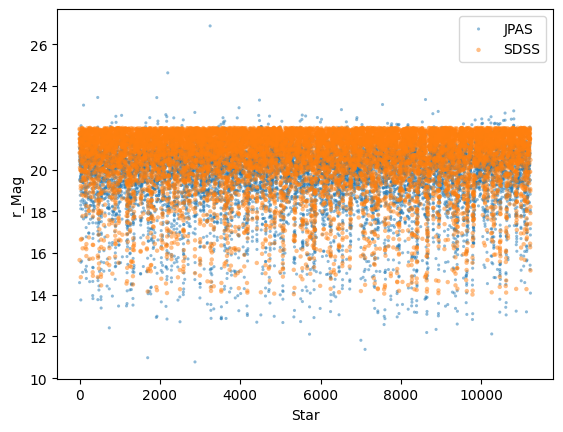

In [40]:
rSDSS_ID = 58 
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})
r_mags['r_jpas'] = r_mags['r_jpas'].apply(lambda row : -2.5 * np.log10(row * 1e-10))
# figure1 = plt.figure(figsize=(10, 10))
plt.scatter(x=r_mags.index, y=r_mags['r_jpas'], s=5, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=r_mags.index, y=r_mags['r_sdss'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('Star')
plt.ylabel('r_Mag')
plt.legend()
plt.show()

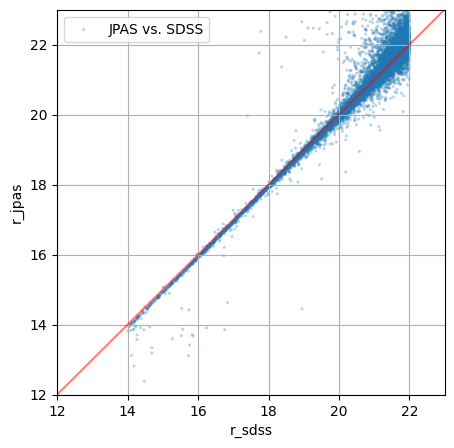

In [41]:
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})

r_mags['r_jpas_mag'] = r_mags['r_jpas'].apply(lambda row : 26-2.5 * np.log10(row))

figure1 = plt.figure(figsize=(5, 5))
plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.xlim(12, 23)
plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

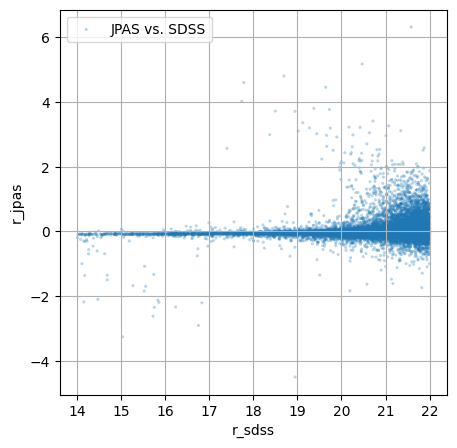

In [42]:
figure1 = plt.figure(figsize=(5, 5))
# plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag']-r_mags['r_sdss'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
# plt.xlim(12, 23)
# plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

In [15]:
result = sigma_clip(r_mags['r_jpas_mag']-r_mags['r_sdss'], sigma=3, cenfunc=np.median)

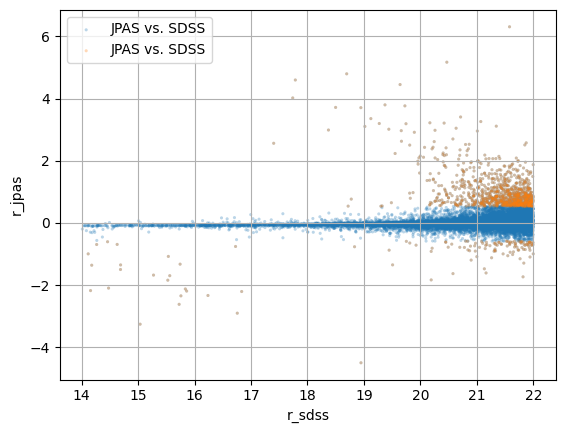

In [16]:
x = r_mags['r_sdss']
y = r_mags['r_jpas_mag']-r_mags['r_sdss']

plt.scatter(x, y, s=5, edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.scatter(x[result.mask], y[result.mask], s=5, edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.grid()
plt.legend()
plt.show()

Task: remove outliers using sigma clip method.
Merge df_merge with df_flux columns

C:\Users\kovai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:197: UserWarning: Warning: converting a masked element to nan.
  offsets = np.asanyarray(offsets, float)


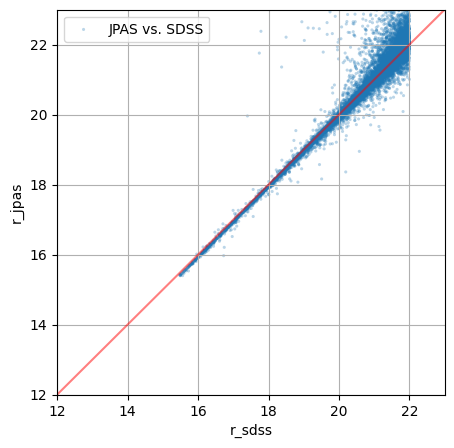

In [17]:
filtered_mags = sigma_clip(r_mags, sigma=4, maxiters=None, cenfunc='median', masked=True)
r_jpas = {}
r_sdss = {}

for i  in range(len(filtered_mags)):
    r_jpas[i] = filtered_mags[i][2]
    r_sdss[i] = filtered_mags[i][1]

r_mags_filtered = pd.DataFrame({'r_sdss': r_sdss,
                                'r_jpas': r_jpas})

figure1 = plt.figure(figsize=(5, 5))
plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags_filtered['r_sdss'], y=r_mags_filtered['r_jpas'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.xlim(12, 23)
plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

In [18]:
df_flux_merged = df_merged
columns = df_flux.columns.values.tolist()
for column in columns:
    df_flux_merged[column] = df_flux[column]
    
df_flux_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...         8716  \
0      20.27203  20.22480  20.04869  3177       5  ...   115.620277   
1      21.49035  20.82659  20.30259  3177       5  ...    10.348244   
2      16.18532  16.04713  16.02548  3177       5  ...  5574.808110   
3      21.53168  21.22415  20.97393  3177       5  ...    39.833759   
4      17.11214  16.51913  16.20456  3177       6  ...  4573.188960   
...         ...       ...       ...   ...     ...  ...          ...   
11224  21.91027  20.72726  20.93438  3712       3  ...     9.100890   
11225  20.99624  20.11850  19.59448  3712       3  ...   122.078468   
11226  21.32424  23.87182  23.40334  3712       3  ...    16.436688   
11227  17.34359  17.33805  17.37105  3712       3  ...  1433.196410   
11228  20.86529  19.70091  20.91512  3712       3  ...    19.884501   

              8810         8912         9000         9107         9316  \
0       121.908005   109.617432    85.042366    80.784210    77.960510   
1         9.803634    -4.148968    19.073219     4.000984     8.714289   
2      5550.260250  5090.215820  4869.805660  5064.409180  4517.976070   
3         8.877821    51.904533    40.474384    40.142117    34.061413   
4      4554.304200  4338.682620  4247.596190  4394.168950  4252.207030   
...            ...          ...          ...          ...          ...   
11224    65.591621    36.135643    44.240223   -10.062006    21.221300   
11225   136.488647   130.862381   131.511703   155.036331   140.461609   
11226    -5.416476    -2.866711   -28.517208   -22.368950    11.541579   
11227  1428.044430  1422.888670  1416.839600  1400.028200  1135.339600   
11228    21.141523   -21.383547    16.180847    -0.673573   -13.094439   

              3623          4750         6250         7725  
0       348.759430    290.605560   189.218094   163.329941  
1        34.998966     30.923809    70.149841    79.484497  
2      6254.568360  10038.346700  9067.625000  6860.720210  
3        45.039337     70.858406    49.707184    45.483406  
4       396.522980   2037.473510  3981.002690  4632.118650  
...            ...           ...          ...          ...  
11224    -4.004103     14.583567    26.111908    25.467243  
11225     6.092162     27.302874    86.375099   140.202820  
11226    10.152276     47.978416    36.766716    33.168705  
11227  3628.869870   4287.578610  3004.959470  1978.652100  
11228    45.989357     11.591095    11.028273    12.593917  

[11229 rows x 81 columns]

# Compare SDSS spectra with JPAS

In [6]:
df_merged = pd.read_csv('./data/merged2.csv')
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...            specObjID  \
0      20.27203  20.22480  20.04869  3177       5  ...  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5  ...                    0   
2      16.18532  16.04713  16.02548  3177       5  ...                    0   
3      21.53168  21.22415  20.97393  3177       5  ...  8263060344039299072   
4      17.11214  16.51913  16.20456  3177       6  ...                    0   
...         ...       ...       ...   ...     ...  ...                  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...                    0   
11225  20.99624  20.11850  19.59448  3712       3  ...                    0   
11226  21.32424  23.87182  23.40334  3712       3  ...                    0   
11227  17.34359  17.33805  17.37105  3712       3  ...                    0   
11228  20.86529  19.70091  20.91512  3712       3  ...                    0   

       jpas_idx     sep2d  sdss_idx  ALPHA_J2000  DELTA_J2000  \
0         21721  0.078537         0   213.268111    52.116478   
1         20164  0.052191         1   213.203459    52.128431   
2         35568  0.282189         4   213.759182    52.055734   
3         30366  0.007762         5   213.686463    52.010739   
4         36769  0.158345        15   213.651566    52.329213   
...         ...       ...       ...          ...          ...   
11224     26036  0.105546     34974   215.786123    53.159128   
11225     10862  0.139786     34975   215.646403    53.094310   
11226     11705  0.638891     34976   215.627436    53.081669   
11227     33105  0.293103     34977   215.599807    53.166198   
11228     33132  0.127277     34978   215.466440    53.244545   

                                               FLUX_AUTO  \
0      428.658691 308.865997 384.88208 278.647003 361...   
1      45.5922813 21.9729233 37.9543076 22.007618 12....   
2      6429.23193 6839.23438 6717.17969 8188.37354 98...   
3      47.6247559 118.16404 49.0911674 56.4392166 89....   
4      331.251312 372.356964 411.324707 643.066467 10...   
...                                                  ...   
11224  30.2855377 10.1931648 5.93644333 21.1268482 17...   
11225  15.9276161 -1.2253952 21.9397602 -29.8224621 2...   
11226  -36.9475937 106.413177 32.0627708 43.58815 54....   
11227  3147.09888 3940.67407 4550.96729 4933.86182 48...   
11228  -37.3740158 53.2009926 22.4615402 24.3613911 3...   

                                        FLUX_RELERR_AUTO CLASS_STAR  TILE_ID  
0      0.053864 0.14563 0.043213 0.078796 0.111389 0....      0.054     2470  
1      0.659668 2.046875 0.423828 1.140625 0.45166 1....      0.012     2470  
2      0.006107 0.011581 0.004803 0.005161 0.006771 0...      0.864     2470  
3      0.421387 0.322998 0.286865 0.317627 0.381836 2...      0.544     2470  
4      0.102722 0.186157 0.061005 0.05188 0.060608 0....      0.852     2470  
...                                                  ...        ...      ...  
11224  1.010742 3.609375 2.679688 1.202148 1.174805 -...      0.002     2406  
11225  1.392578 -9.703125 0.501953 -0.269287 0.589355...     

In [43]:
cond_sp = df_merged["specObjID"] != 0
df_spectra = df_merged[cond_sp]
df_spectra

objid          ra        dec         u         g  \
1      1237659120396075265  213.349805  52.063320  22.39950  21.84116   
6      1237659120396075626  213.356396  52.064137  25.70062  23.49796   
7      1237659120396075654  213.391388  52.036163  21.38392  21.94886   
10     1237659120396075698  213.455232  52.011906  24.30660  21.80434   
11     1237659120396140736  213.571361  51.956279  20.99424  20.47704   
...                    ...         ...        ...       ...       ...   
10902  1237661417139667810  215.923413  53.165071  22.64516  23.33676   
11081  1237661417139535932  215.557554  53.229940  23.94888  21.40876   
11082  1237661417139536033  215.558690  53.254664  21.24005  21.22499   
11083  1237661417139536040  215.536025  53.192329  19.70670  18.78120   
11143  1237661417139601523  215.673968  53.106136  18.78574  17.65990   

              r         i         z   run  camcol  ...  \
1      21.48263  21.25299  20.81412  3177       5  ...   
6      21.09322  19.83593  18.99952  3177       5  ...   
7      21.27552  20.72769  21.67557  3177       5  ...   
10     20.10044  18.97817  18.37750  3177       5  ...   
11     20.43086  20.23825  20.14130  3177       5  ...   
...         ...       ...       ...   ...     ...  ...   
10902  21.73841  20.71141  20.26174  3712       3  ...   
11081  19.52385  18.89076  18.58686  3712       3  ...   
11082  21.15645  20.62183  20.74698  3712       3  ...   
11083  18.48366  18.40933  18.37995  3712       3  ...   
11143  17.03474  16.67522  16.47555  3712       3  ...   

                                                   FLAGS  \
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
6      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
7      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
10     0 0 0 0 0 0 16 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
11     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
10902  0 0 16 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...   
11081  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
11082  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11083  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11143  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
1      0.835532188 0.90825063 0.883063436 0.925633252...   
6      0.845834911 0.905985534 0.886291206 0.9313851 ...   
7      0.492083579 0.909230173 0.76278317 0.939537346...   
10     0.841869652 0.914786458 0.909880698 0.94690489...   
11     0.905167162 0.93117851 0.923615515 0.947989523...   
...                                                  ...   
10902  0.927903056 0.929574311 0.403141052 0.94543081...   
11081  0.953160882 0.960085869 0.969090104 0.97095555...   
11082  0.942616165 0.961406171 0.968345881 0.96381533...   
11083  0.711913884 0.950825751 0.96126318 0.965172589...   
11143  0.940692663 0.950213432 0.957360208 0.97177487...   

                                              MASK_FLAGS  \
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
6      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
7      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
10     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
10902  0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 ...   
11081  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11082  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11083  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11143  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
1      0 0 1734 0 0 0 2059 2087 0 3050 0 1901 0 2341 ...   
6      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
7      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
10     0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [44]:
idx = 7
coords_sp = SkyCoord(ra=df_spectra.loc[idx, 'ra'], dec=df_spectra.loc[idx, 'dec'], unit=(u.deg, u.deg), frame='icrs')
result = SDSS.get_spectra(coordinates=coords_sp, radius=1*u.arcsec)
result[0].writeto(f'./data/spectra_{idx:06d}.fits', overwrite=True)
# pkl.dump(result, open(f'./data/spectra_{idx:06d}.pkl', 'wb'))

In [45]:
result = fits.open(f'./data/spectra_{idx:06d}.fits')
result.info()

Filename: ./data/spectra_000007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   ()      
  1  COADD         1 BinTableHDU     26   4626R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPALL         1 BinTableHDU    488   1R x 236C   [27A, 14A, 4A, E, E, J, J, E, J, E, E, E, K, K, K, K, K, K, K, K, K, B, B, J, I, 5E, 5E, J, J, J, J, 7A, 7A, 16A, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, 5E, E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 16A, 9A, 12A, E, E, E, E, E, E, E, E, J, E, E, J, J, 6A, 21A, E, 35E, K, 19A, 19A, 19A, B, B, B, I, 3A, B, I, I, I, I, J, E, J, J, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5J, 75E, 75E, 5E, 5E, 5E, 5J, 5E, D, D, D, D, D, D, D, D, D, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5

In [46]:
data = result[1].data

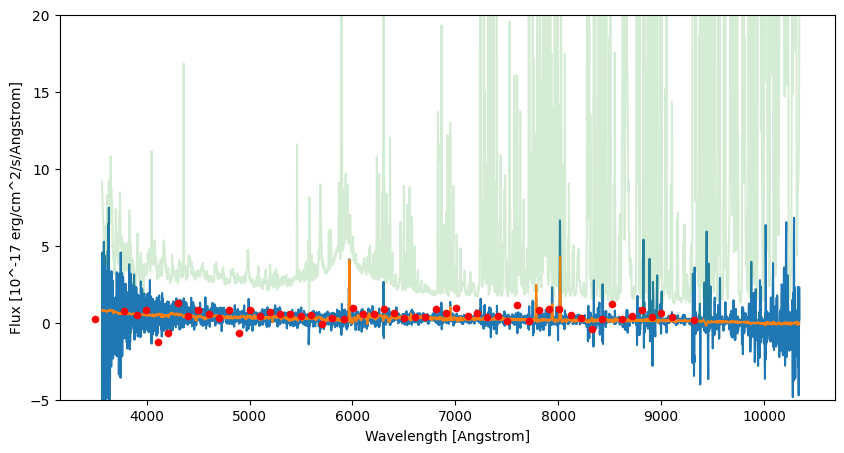

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(10**data['loglam'], data['flux'])
plt.plot(10**data['loglam'], data['model'])
plt.plot(10**data['loglam'], data['sky'], alpha=0.2)

plt.scatter(df_flux.columns[:-4], df_flux.loc[idx, :].values[:-4] / 100,
            color='red', s=20, zorder=10)
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux [10^-17 erg/cm^2/s/Angstrom]')
plt.ylim(-5, 20)
plt.show()

TODO: Get classification from SDSS df_spectra, and redshift (z)
Compare: PhotoPrymary, Spectra, and JPAS calsses.


In [26]:
df_flux

3497         3782         3904         3996         4110  \
0       428.658691   308.865997   384.882080   278.647003   361.446442   
1        45.592281    21.972923    37.954308    22.007618    12.640756   
2      6429.231930  6839.234380  6717.179690  8188.373540  9891.036130   
3        47.624756   118.164040    49.091167    56.439217    89.834892   
4       331.251312   372.356964   411.324707   643.066467  1033.802250   
...            ...          ...          ...          ...          ...   
11224    30.285538    10.193165     5.936443    21.126848    17.796532   
11225    15.927616    -1.225395    21.939760   -29.822462    24.239641   
11226   -36.947594   106.413177    32.062771    43.588150    54.667030   
11227  3147.098880  3940.674070  4550.967290  4933.861820  4857.057130   
11228   -37.374016    53.200993    22.461540    24.361391    30.019119   

              4203         4303         4403          4503          4603  ...  \
0       329.904541   373.368713   294.262573    388.088928    303.253723  ...   
1        39.618355    21.870281    32.347305    -28.031401     23.629484  ...   
2      9819.850590  9222.009770  9935.850590  10933.725600  10905.127900  ...   
3        16.295548    74.441139    64.283310     70.093681     47.715321  ...   
4       887.056641  1059.994510  1540.379270   1986.656130   2288.412110  ...   
...            ...          ...          ...           ...           ...  ...   
11224   -24.746517    22.876118    39.852066     -0.240590      4.930181  ...   
11225   -11.013321    29.881607    13.242824     22.658485     38.121796  ...   
11226   107.455605    47.222183    63.994282    162.226089     70.151825  ...   
11227  5259.936040  4655.021480  4700.866700   4793.632320   4718.938960  ...   
11228     4.391259    17.691521   -11.383204    -72.926178     28.984285  ...   

              8716         8810         8912         9000         9107  \
0       115.620277   121.908005   109.617432    85.042366    80.784210   
1        10.348244     9.803634    -4.148968    19.073219     4.000984   
2      5574.808110  5550.260250  5090.215820  4869.805660  5064.409180   
3        39.833759     8.877821    51.904533    40.474384    40.142117   
4      4573.188960  4554.304200  4338.682620  4247.596190  4394.168950   
...            ...          ...          ...          ...          ...   
11224     9.100890    65.591621    36.135643    44.240223   -10.062006   
11225   122.078468   136.488647   130.862381   131.511703   155.036331   
11226    16.436688    -5.416476    -2.866711   -28.517208   -22.368950   
11227  1433.196410  1428.044430  1422.888670  1416.839600  1400.028200   
11228    19.884501    21.141523   -21.383547    16.180847    -0.673573   

              9316         3623          4750         6250         7725  
0        77.960510   348.759430    290.605560   189.218094   163.329941  
1         8.714289    34.998966     30.923809    70.149841    79.484497  
2      4517.976070  6254.568360  10038.346700  9067.625000  6860.720210  
3        34.061413    45.039337     70.858406    49.707184    45.483406  
4      4252.207030   396.522980   2037.473510  3981.002690  4632.118650  
...            ...          ...           ...          ...          ...  
11224    21.221300    -4.004103     14.583567    26.111908    25.467243  
11225   140.461609     6.092162     27.302874    86.375099   140.202820  
11226    11.541579    10.152276     47.978416    36.766716    33.168705  
11227  1135.339600  3628.869870   4287.578610  3004.959470  1978.652100  
11228   -13.094439    45.989357     11.591095    11.028273    12.593917  

[11229 rows x 60 columns]

# Interpolate

In [51]:
from scipy import interpolate

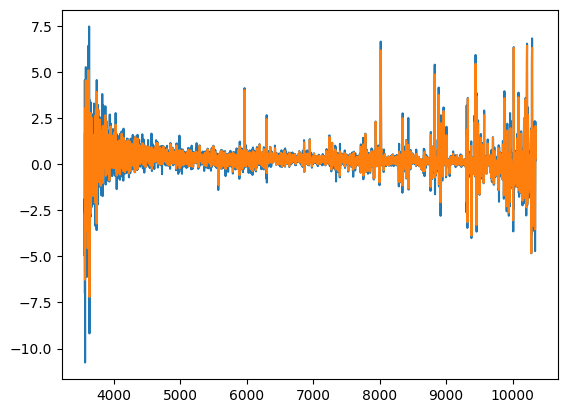

wavelength      flux
0      3566.153879 -2.633729
1      3568.153879 -4.828932
2      3570.153879 -5.501574
3      3572.153879 -6.269949
4      3574.153879  3.032025
...            ...       ...
3385  10336.153879 -3.538597
3386  10338.153879 -3.438305
3387  10340.153879 -0.650615
3388  10342.153879  2.067965
3389  10344.153879  0.313909

[3390 rows x 2 columns]

In [52]:
x = 10**data['loglam'].astype(float)
y = data['flux'].astype(float)
f = interpolate.interp1d(x, y)

xnew = np.arange(x.min(), x.max(), 2)

ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, '-', xnew, ynew, '-')
plt.show()
df_sdss_spec_interp = pd.DataFrame({'wavelength': xnew, 'flux': ynew})
df_sdss_spec_interp

# Resampling

In [53]:
min_spectrum = int(x.min())-1
max_spectrum = df_flux.columns[:-4].astype(float).max()
num_points = (max_spectrum - min_spectrum)/50 
print(min_spectrum, max_spectrum, num_points, max_spectrum - min_spectrum )

3565 9316.0 115.02 5751.0


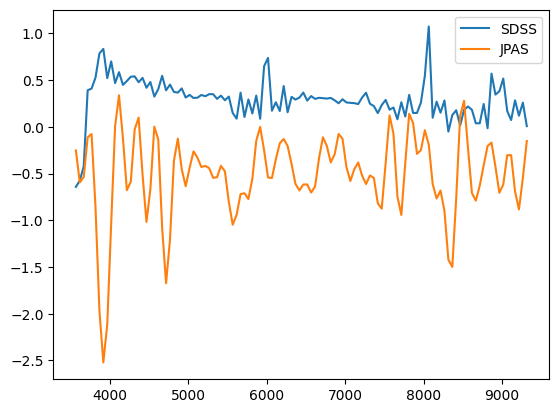

In [54]:
# Resample SDSS
x = 10**data['loglam'].astype(float)
y = data['flux'].astype(float)

f = interpolate.interp1d(x, y)
x = np.arange(x.min(), x.max(), 2)
y = f(x)

x = np.insert(x, 0, min_spectrum)
y = np.insert(y, 0, y[:5].mean())
cond = x < max_spectrum
x = x[cond]
x = np.append(x, max_spectrum)
y = y[cond]
y = np.append(y, y[-5:].mean())

y_resampled_sdss = signal.resample(y, int(num_points)+1)
y_resampled_sdss
x_resampled = np.linspace(min_spectrum, max_spectrum, int(num_points)+1)

x = np.array(df_flux.columns[:-4].astype(float))
y = df_flux.loc[idx, x].values
cond = x > min_spectrum
x = x[cond]
np.insert(x, 0, min_spectrum)
# TODO: Interpolate 0 AND 1 BY LINEAR
y = y[cond]
cond = x < max_spectrum
x = x[cond]
x = np.append(x, max_spectrum)
y = y[cond]
y = np.append(y, y[-1])

y_resampled_jpas = signal.resample(y, int(num_points)+1)
y_resampled_jpas

plt.plot(x_resampled, y_resampled_sdss, label='SDSS')
plt.plot(x_resampled, y_resampled_jpas / 100 - 1, label='JPAS')
plt.legend()
# x_japs_resampled, y_jpas_resampled = signal.resample(y_jpas, num_jpas_samples, t=x_jpas) 
# x_resampled

In [55]:
num_sdss_samples = round((10**data['loglam'].astype(float).max() - 10**data['loglam'].astype(float).min())/50.1756)

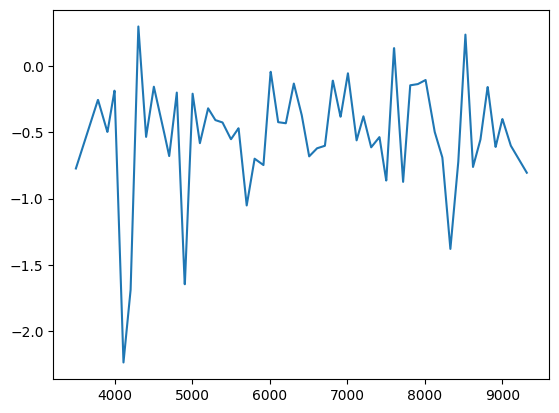

In [56]:
x_jpas = df_flux.columns[:-4].values
y_jpas = df_flux.loc[idx, :].values[:-4]/100 -1
f = interpolate.interp1d(x_jpas, y_jpas)

x_jpasnew = np.arange(x_jpas.min(), x_jpas.max(), 2)

y_jpasnew = f(x_jpasnew)
plt.plot(x_jpasnew, y_jpasnew, '-')
plt.show()
df_jpas_spec_interp = pd.DataFrame({'wavelength': x_jpasnew, 'flux': y_jpasnew})
x_jpas.max()
num_jpas_samples = round((df_jpas_spec_interp['wavelength'].max() -df_jpas_spec_interp['wavelength'].min())/50.1756)

In [57]:
10**data['loglam'].astype(float).min()
df_flux.columns.values.max()

9316

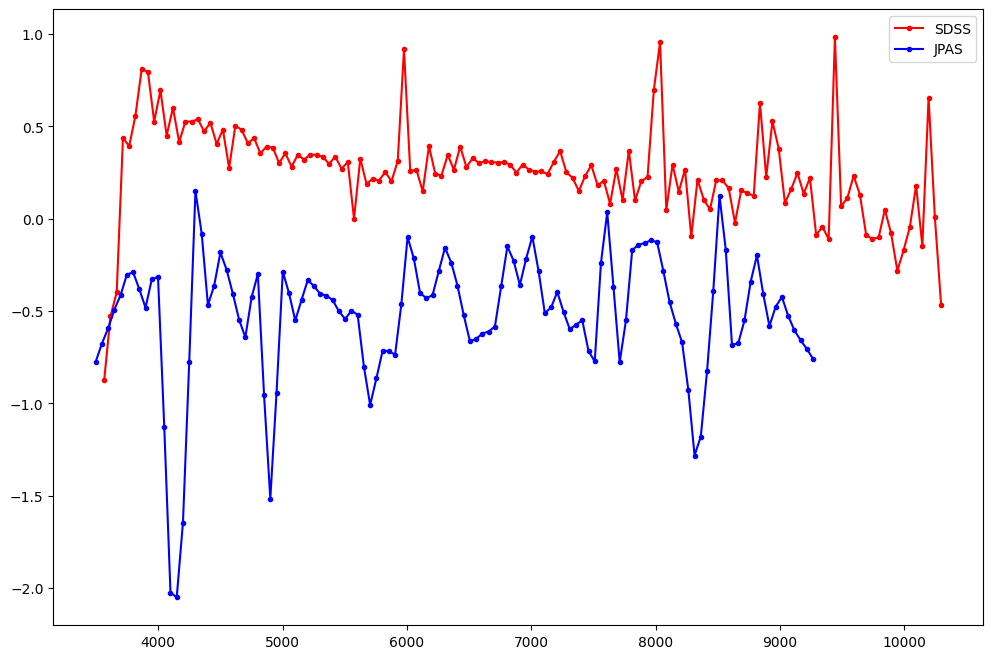

0.09645488467111307


In [58]:
x = df_sdss_spec_interp['wavelength']
y = df_sdss_spec_interp['flux']

x_jpas = df_jpas_spec_interp['wavelength']
y_jpas = df_jpas_spec_interp['flux']

plt.figure(figsize=(12, 8))
x.min()
x_resampled, y_resampled = signal.resample(y, num_sdss_samples, t=x)
x_japs_resampled, y_jpas_resampled = signal.resample(y_jpas, num_jpas_samples, t=x_jpas) 

plt.plot(y_resampled, x_resampled, marker='.', linestyle='-', color='r', label="SDSS")
plt.plot(y_jpas_resampled, x_japs_resampled, marker='.', linestyle='-', color='b', label="JPAS")
plt.legend()
#xx = df_flux.columns[:-4].values
#yy = df_flux.loc[idx, :].values[:-4] / 100 -1
#for x, y in zip(xx, yy):
#   plt.plot([x, x], [0, y])
plt.show()
# f.shape
print(x_japs_resampled[0] - x_resampled[0])

<Axes: >

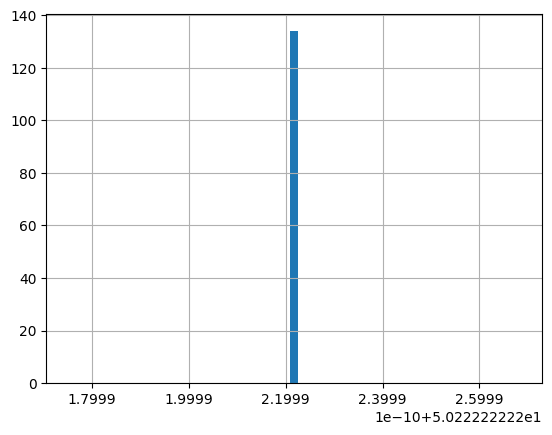

In [59]:

df_sdss_spec_resampled = pd.DataFrame({'wavelength': x_resampled, 'flux': y_resampled})
df_sdss_spec_resampled['flux'].diff().hist(bins=1)

In [60]:
# TODO: Resample the flux to the same wavelength as the SDSS spectra
# TODO: Compare xmatch our with the xmatch from JPAS xmacth_sdss

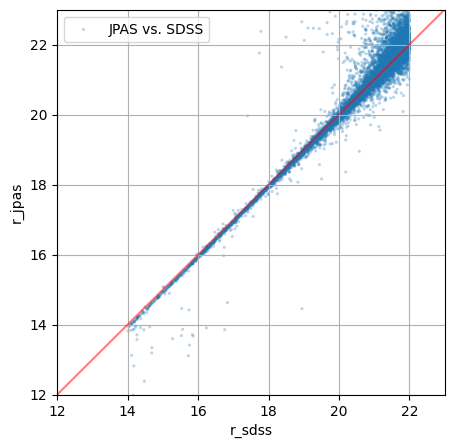

In [ ]:
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})

r_mags['r_jpas_mag'] = r_mags['r_jpas'].apply(lambda row : 26-2.5 * np.log10(row))

figure1 = plt.figure(figsize=(5, 5))
plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.xlim(12, 23)
plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

<Axes: >

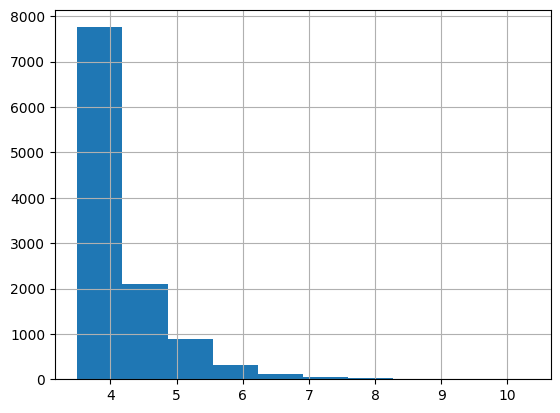

In [62]:
df_merged['KRON_RADIUS'].hist()

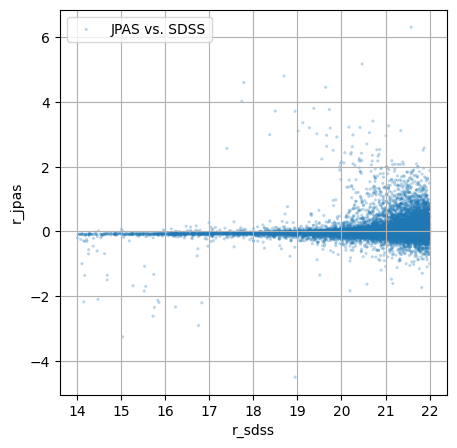

In [ ]:
figure1 = plt.figure(figsize=(5, 5))
# plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag']-r_mags['r_sdss'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
# plt.xlim(12, 23)
# plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()